In [1]:
#https://colab.research.google.com/drive/1P9TPRWsDdqJC6IvOxjG2_3QlgCt59P0w?usp=sharing#scrollTo=XGsxbcqxIGJg
#https://www.youtube.com/watch?v=j3VNqtJUoz0&t=363s

In [2]:
#IMAGE PATCHING

from torchvision.transforms import Resize, ToTensor

transforms = [Resize((144, 144)), 
              ToTensor()] #les transfo effectués sur chaque image

class Compose(object): #transform image to the same sizes and transform to tensor
    def __init__(self, transforms) -> None:
        self.tansforms = transforms  #ou est la focntion transforms ?

    def __call__(self, *image, target) : #permet d'appeler objet comme des fonctions 
                                                        #exemple : si c = Compose()  -> on peut faire c() pour appeler cette focntion
        for t in self.transforms:  #pour chaque transfo dans transforms (ici on en a 2 - resize + ToTensor())
            print(t)
            image = t(image)
        return image, target
    
c = Compose(transforms)


In [3]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

#parameters 
height_image, width_image = 144, 144

class LeafDataset(Dataset):           #transform data #add labels 
    def __init__(self) -> None:
        super().__init__()

        self.path = "dataset/plant-pathology-2020-fgvc7"

        self.path_dir_X = os.path.join(self.path, 'images')

        self.path_Y = os.path.join(self.path, 'train.csv')
        self.dataframe_Y = pd.read_csv(self.path_Y)
        self.labels = self.dataframe_Y.loc[:, 'healthy':'scab']

        self.transform = A.Compose([
        #A.RandomResizedCrop(height=height_image, width=width_image, p=1.0), #au lieu de 500 - sinon le cpu ne suit pas - et kill tout les kernels python
        A.Resize(height=height_image, width=width_image),
        A.Rotate(20, p=1.0), 
        A.Flip(p=1.0),
        A.Transpose(p=1.0), 
        A.Normalize(p=1.0),  
        ToTensorV2(p=1.0),
        ], p=1.0)

        self.len = len(self.dataframe_Y)

    def __getitem__(self, index): #on defini le dataset et les transfo ici - car quand je vais appeller le dataloader - ca va parcourir toutes le simages donc passé par getitem
        img_name = self.dataframe_Y.loc[index, 'image_id']   #image_id,healthy,multiple_diseases,rust,scab
                                                             #Train_0,0,0,0,1      -> dans train.csv on a le nom du fichier ex : df[0]['image_id] = Train_0
        img_path = f"{self.path_dir_X}/{img_name}.jpg"
        image = plt.imread(img_path)

        image = self.transform(image = image)['image'] #resize / normalized / ....  #on prend ["image"] car renvoi un dictionnaire a la base 
        
        #test pour voir image de sorti
        #permute_transfo_image = image.permute(1, 2, 0)   #pour pouvoir l'afficher en plotlib
        #plt.imshow(permute_transfo_image)
        #plt.show()

        label = torch.tensor(np.argmax(self.labels.loc[index,:].values))  #on obtient la label avec argmax
        #print(f'label : {label}')   #maintenant on aplus que la label et plus le tableau 
                                    #on peut maitnent calculer une loss - on pouvait pas avant avec array : tensor([0, 0, 1, 0])

        return image, label
    
    def __len__(self):
        return self.len

In [4]:
# Création de l'instance du dataset
leaf_dataset = LeafDataset()

In [5]:
len(leaf_dataset[0])   #2 elements dans le tuple de chaque elements 

2

In [6]:
leaf_dataset[0][0] #l'image du premier element - index 0


tensor([[[ 0.7591,  0.7077,  0.6049,  ..., -0.2513, -0.2342, -0.2171],
         [ 0.6392,  0.5536,  0.4508,  ..., -0.1999, -0.1657, -0.1314],
         [ 0.4851,  0.3823,  0.2967,  ..., -0.1828, -0.1657, -0.1486],
         ...,
         [ 0.1083,  0.0741,  0.0227,  ..., -0.9877, -0.9705, -0.9705],
         [-0.0458, -0.0629, -0.0629,  ..., -1.0048, -0.9192, -0.7650],
         [-0.2171, -0.2513, -0.3027,  ..., -0.8335, -0.6965, -0.5938]],

        [[ 0.5028,  0.4503,  0.3803,  ..., -0.0399, -0.0049,  0.0126],
         [ 0.3978,  0.3102,  0.2402,  ..., -0.0049,  0.0651,  0.1352],
         [ 0.2227,  0.1702,  0.1001,  ...,  0.0301,  0.0826,  0.1001],
         ...,
         [ 0.5553,  0.5378,  0.5203,  ..., -0.5301, -0.4776, -0.4076],
         [ 0.4328,  0.4153,  0.4328,  ..., -0.5126, -0.3550, -0.1625],
         [ 0.2577,  0.2402,  0.2052,  ..., -0.2150, -0.0574,  0.0826]],

        [[ 0.1651,  0.1128,  0.0256,  ..., -0.7238, -0.7064, -0.6890],
         [ 0.0605, -0.0267, -0.1138,  ..., -0

In [7]:
leaf_dataset[0][1] #la classe du premier element - index 0

tensor(3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

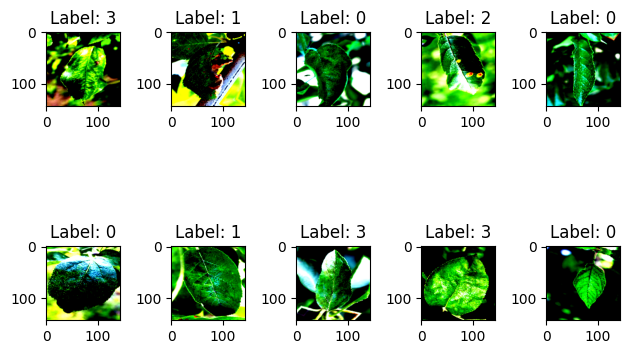

In [8]:
from torch.utils.data import DataLoader

# Création de l'instance du dataset
leaf_dataset = LeafDataset()

# Création d'un DataLoader pour charger les données
batch_size = 10
data_loader = DataLoader(leaf_dataset, batch_size=batch_size, shuffle=False)

# Affichage des 10 premières images
num_displayed = 0
for batch_idx, (images, labels) in enumerate(data_loader):
    for i in range(len(images)):
        # Afficher l'image
        plt.subplot(2, 5, num_displayed + 1)
        plt.imshow(images[i].permute(1, 2, 0))  # Assurez-vous que les dimensions sont dans l'ordre attendu pour Matplotlib
        plt.title(f"Label: {labels[i]}")
        #plt.axis('off')
        num_displayed += 1
        
        if num_displayed == 10:
            break
    if num_displayed == 10:
        break

plt.tight_layout()
plt.show()

In [9]:
#PATCHES 

from torch import nn
from einops.layers.torch import Rearrange # for rearranging image patches.
from torch import Tensor

class PatchEmbedding(nn.Module):
    def __init__(self, in_channels = 3, patch_size = 8, emb_size = 128):
        self.patch_size = patch_size  #8*8 pixels
        super().__init__()
        self.projection = nn.Sequential(  # Définition séquentielle des couches du réseau
            Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=patch_size, p2=patch_size),  #patch images in 8*8 pixels patch
            nn.Linear(patch_size * patch_size * in_channels, emb_size)  #flat image 
        )

    def forward(self, x: Tensor) -> Tensor:
        x = self.projection(x)  #on appelle projection en faisant -> objet(Tensor)
        return x
    
# Run a quick test
sample_datapoint = torch.unsqueeze(leaf_dataset[0][0], 0) #on applique patching a l'image don ocn prend element [idx][0]
                                     #unsqueeze ajoute une dimension a la position 0 ici

print("Initial shape: ", sample_datapoint.shape)
embedding = PatchEmbedding()(sample_datapoint)  #on applique le forward du PatchEMbeding sur l'image 0 du batch 0 
print("Patches shape: ", embedding.shape)


Initial shape:  torch.Size([1, 3, 144, 144])
Patches shape:  torch.Size([1, 324, 128])


In [10]:
class Attention(nn.Module): #defini mechanisme d'attention -> embeding table avec les poids apropriées
    def __init__(self, dim, n_heads, dropout):
        super().__init__()
        self.n_heads = n_heads #nombre de tetes d'attention - pour performer plusieur calcul d'attention en mmem temps 
                            #jointly attend to information from different representation subspaces
        self.att = torch.nn.MultiheadAttention(embed_dim = dim, num_heads = n_heads, dropout=dropout)
                            #embed dim -> taille de vecteur représentant chaque token dans la embeding table*
                            #dropout -> pour eviter le suraprentissage - overfitting - désactive aléatoirement des unités pendant l'entrainement
        
        self.q = torch.nn.Linear(dim, dim) #couche linéaire de taille dim vers dim 
        self.k = torch.nn.Linear(dim, dim)
        self.v = torch.nn.Linear(dim, dim)

    def forward(self, x):
        q = self.q(x)
        k = self.k(x)
        v = self.v(x)
        attn_output, attn_output_weights = self.att(x, x, x)  #on aplique le multi head attention
        return attn_output

In [11]:
Attention(dim=128, n_heads=4, dropout=0.)(torch.ones((1, 5, 128))).shape

torch.Size([1, 5, 128])

In [13]:
###################################################################